## **1. Introduction**

**1.1 What is Customer Churn?**

Customer churn is defined as when customers discontinue doing business with a firm or service.

Customers in the all the industry can choose from a variety of service providers and actively switch from one to the next.

Individualized customer retention is hard because most firms have a large number of customers and can't spend much time to each of them. The costs would be too high, outweighing the additional revenue.

However, if a corporation could prdict which customers are likely to leave ahead of time, it will be easy to focus efforts only on these "high risk" clients. The ultimate goal is to expand area and retrieve more customers loyalty.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To reduce customer churn, companies need to predict which customers are at high risk of churn.

First develop a holistic view of the customers and their interactions across numerous channels, including branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, etc.

As a result, by addressing churn, these businesses may preserve their market position, also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit.

**Objectives**



*   What's the % of Churn Customers and customers that keep in with the active services?
*   Is there any patterns in Churn Customers based on the gender?
*   Is there any patterns/preference in Churn Customers based on the type of service provided?
*   What's the most profitable service types?
*   Which features and services are most profitable?

# **2. Loading libraries and data**

**2.1 libraries**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install catboost
!pip install optuna

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

#Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

#preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.combine import SMOTEENN #Handle Target Imbalance
import optuna                         #Tune Hyper PM
from sklearn.model_selection import  GridSearchCV #Tune Hyper PM

#Libraries for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


**2.2 Data**

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# **Data Understanding**

**Classification Label**

Churn — Whether the customer churned or not (Yes or No)

**1.Services Each Customer Has to Sign Up**

*   **PhoneService** — Whether the customer has a phone service or not (Yes or No)
*   **MultipleLines** — Whether the customer has multiple lines or not (Yes, No, No phone service)
*   **InternetService** — A type of internet service the customer has (DSL, Fiber Optic, No)
*   **OnlineSecurity** — Whether the customer has online security or not (Yes, No, No Internet Service)
*   **OnlineBackup** — Whether the customer has online backup or not (Yes, No, No Internet Service)
*   **DeviceProtection** — Whether the customer has device protection or not (Yes, No, No Internet Service)
*   **TechSupport** — Whether the customer has tech support or not (Yes, No, No Internet Service)
*   **StreamingTV—Whether** the customer has a streaming TV (Yes, No, No Internet Service)
*   **StreamingMovies** — Whether the customer has a streaming movie (Yes, No, No Internet Service)

**2.Customer Account Information (C-3, N-3)**

*   **Contract** — The type of contract the customer has (Month-to-Month, One year
Two years)
*   **PaperlessBilling** — Whether the customer has a paperless billing (Yes, No)
*   **PaymentMethod** — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   **Tenure** — How long customer has stayed in the company
*   **MonthlyCharges** — Amount charged to the customer monthly
*   **TotalCharges** — The total amount charged to the customer


**3.Customer Demographic Info**


*   **CustomerID** — Unique value for each customer
*   **gender** — The type of gender each customer (Female, Male)
*   **SeniorCitizen** — Whether the customer is a senior citizen (Yes, No)
*   **Partner** — Whether the customer has a partner or not (Yes, No)
*   **Dependents** — Whether the customer has a dependent or not (Yes, No)









# **Exploratory Data Analysis (EDA)**

# **3. Explore the data**

In [4]:
#first 5 row pf the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**3.1 Explore Features classes and their values**

In [5]:
# Here we can explore all the features without Numerical features unique values and their counts
df_columns = df.columns.tolist()

# Features to exclude
exclude_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges","customerID"]

# Remove excluded features from the list
for feature in exclude_features:
    if feature in df_columns:
        df_columns.remove(feature)

for column in df_columns:
    unique_values_counts = df[column].value_counts()
    total_values = df[column].count()

    print(f"\n{column} unique values and counts: {unique_values_counts.to_dict()}")
    print(f"Total {column} values: {total_values}")



gender unique values and counts: {'Male': 3555, 'Female': 3488}
Total gender values: 7043

Partner unique values and counts: {'No': 3641, 'Yes': 3402}
Total Partner values: 7043

Dependents unique values and counts: {'No': 4933, 'Yes': 2110}
Total Dependents values: 7043

PhoneService unique values and counts: {'Yes': 6361, 'No': 682}
Total PhoneService values: 7043

MultipleLines unique values and counts: {'No': 3390, 'Yes': 2971, 'No phone service': 682}
Total MultipleLines values: 7043

InternetService unique values and counts: {'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}
Total InternetService values: 7043

OnlineSecurity unique values and counts: {'No': 3498, 'Yes': 2019, 'No internet service': 1526}
Total OnlineSecurity values: 7043

OnlineBackup unique values and counts: {'No': 3088, 'Yes': 2429, 'No internet service': 1526}
Total OnlineBackup values: 7043

DeviceProtection unique values and counts: {'No': 3095, 'Yes': 2422, 'No internet service': 1526}
Total DeviceProtection 




*   Catogarical data are good there is no extra white spaces in feature values
*   PaymentMethod feature should be cleaned "(automatic)"
*   The target column is **Churn**
*   No Inconsistance data




In [6]:
#Shape of the data
df.shape

(7043, 21)

**3.2. Visualize missing values**

<Axes: >

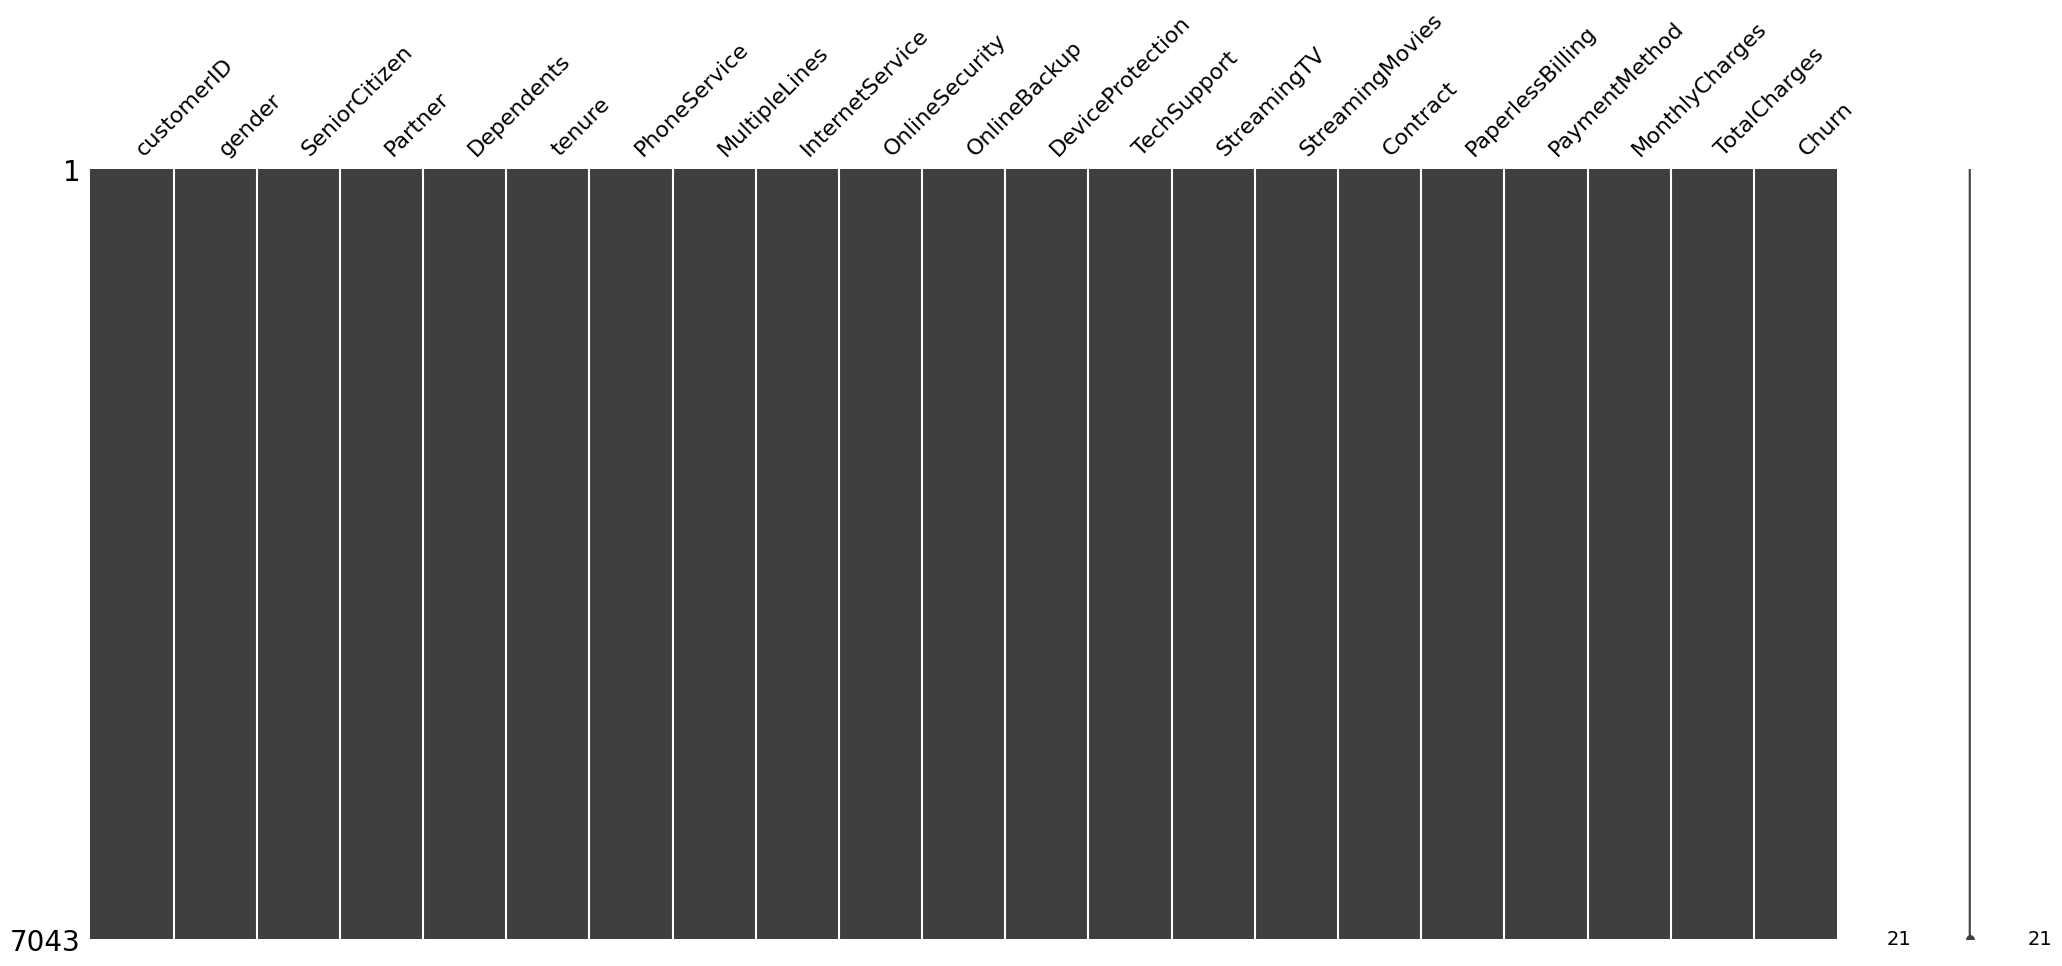

In [7]:
#We can visualize the missing data by library - missingno
msno.matrix(df)

* From the above visualisation it has no peticular pattern that stands out so there is no missing data.

# **4. Data Cleaning**

**4.1 Remove CustomerID**

In [8]:
#CustomerID is not going to help much so drop it
df = df.drop(['customerID'], axis = 1)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


**4.2 Explore data type**

In [9]:
#Data features and their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**The TotalCharges column it must be float not object so we have to change it to float**

**4.3 Find The Data problem**

**Numerical Features are**



*   SeniorCitizen
*   tenure
*   MonthlyCharges
*   TotalCharges





In [10]:
#find the data pattern of the column- so no missing values(0/1-7043 values)
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
#for MonthlyCharges fetures
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df['MonthlyCharges'].isnull().sum()

0

In [12]:
#for TotalCharges fetures
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].isnull().sum()

11

**There should be Blank Spaces so it has been converted as NaN and shows as null values**

In [13]:
#for tenure fetures
df['tenure'] = pd.to_numeric(df.tenure, errors='coerce')
df['tenure'].isnull().sum()

0



  **There maybe Indirect missing values like (blankspaces) in a Numerical features**

**4.4 Explore Blank Spaces**

In [14]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No





*   **We had 11 Blank values in the Feature "Totalcharge"**


*   Also we have 0 value for feature "tenure" but it should not be there so check which rows has these vales in that feature






In [15]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

**4.5 Both are same rows so it is better to remove these row**

In [16]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [17]:
#check again  whether we have null values or not
df['TotalCharges'].isnull().sum()

0

**4.6 The feature payment method, there is a word (automatic), we have to delete it because if we visualize a tick label is so long**

In [18]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **5. Data Visualization**

**5.1 Explore Target**

In [20]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions with Gender",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])

fig.show()



*   73.4 % of customers stays in the firm.
*   Customers are 49.5 % female and 50.5 % male.
*   **Churn is an imbalanced data set because both classes are not equally distributed. To handle it, resampling would be a suitable approach.**






**5.2 Explore Features**

In [21]:
# Function to plot categorical data according to target
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / 2)

    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(categorical_values):
        row_index = index // number_of_columns
        col_index = index % number_of_columns
        ax = axes[row_index, col_index]

        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=ax)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        ax.set_title(column)

    plt.tight_layout()
    plt.show()

##########################################################################################################

#plotting code for Numerical data
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

**1.Analysis Services Each Customer**

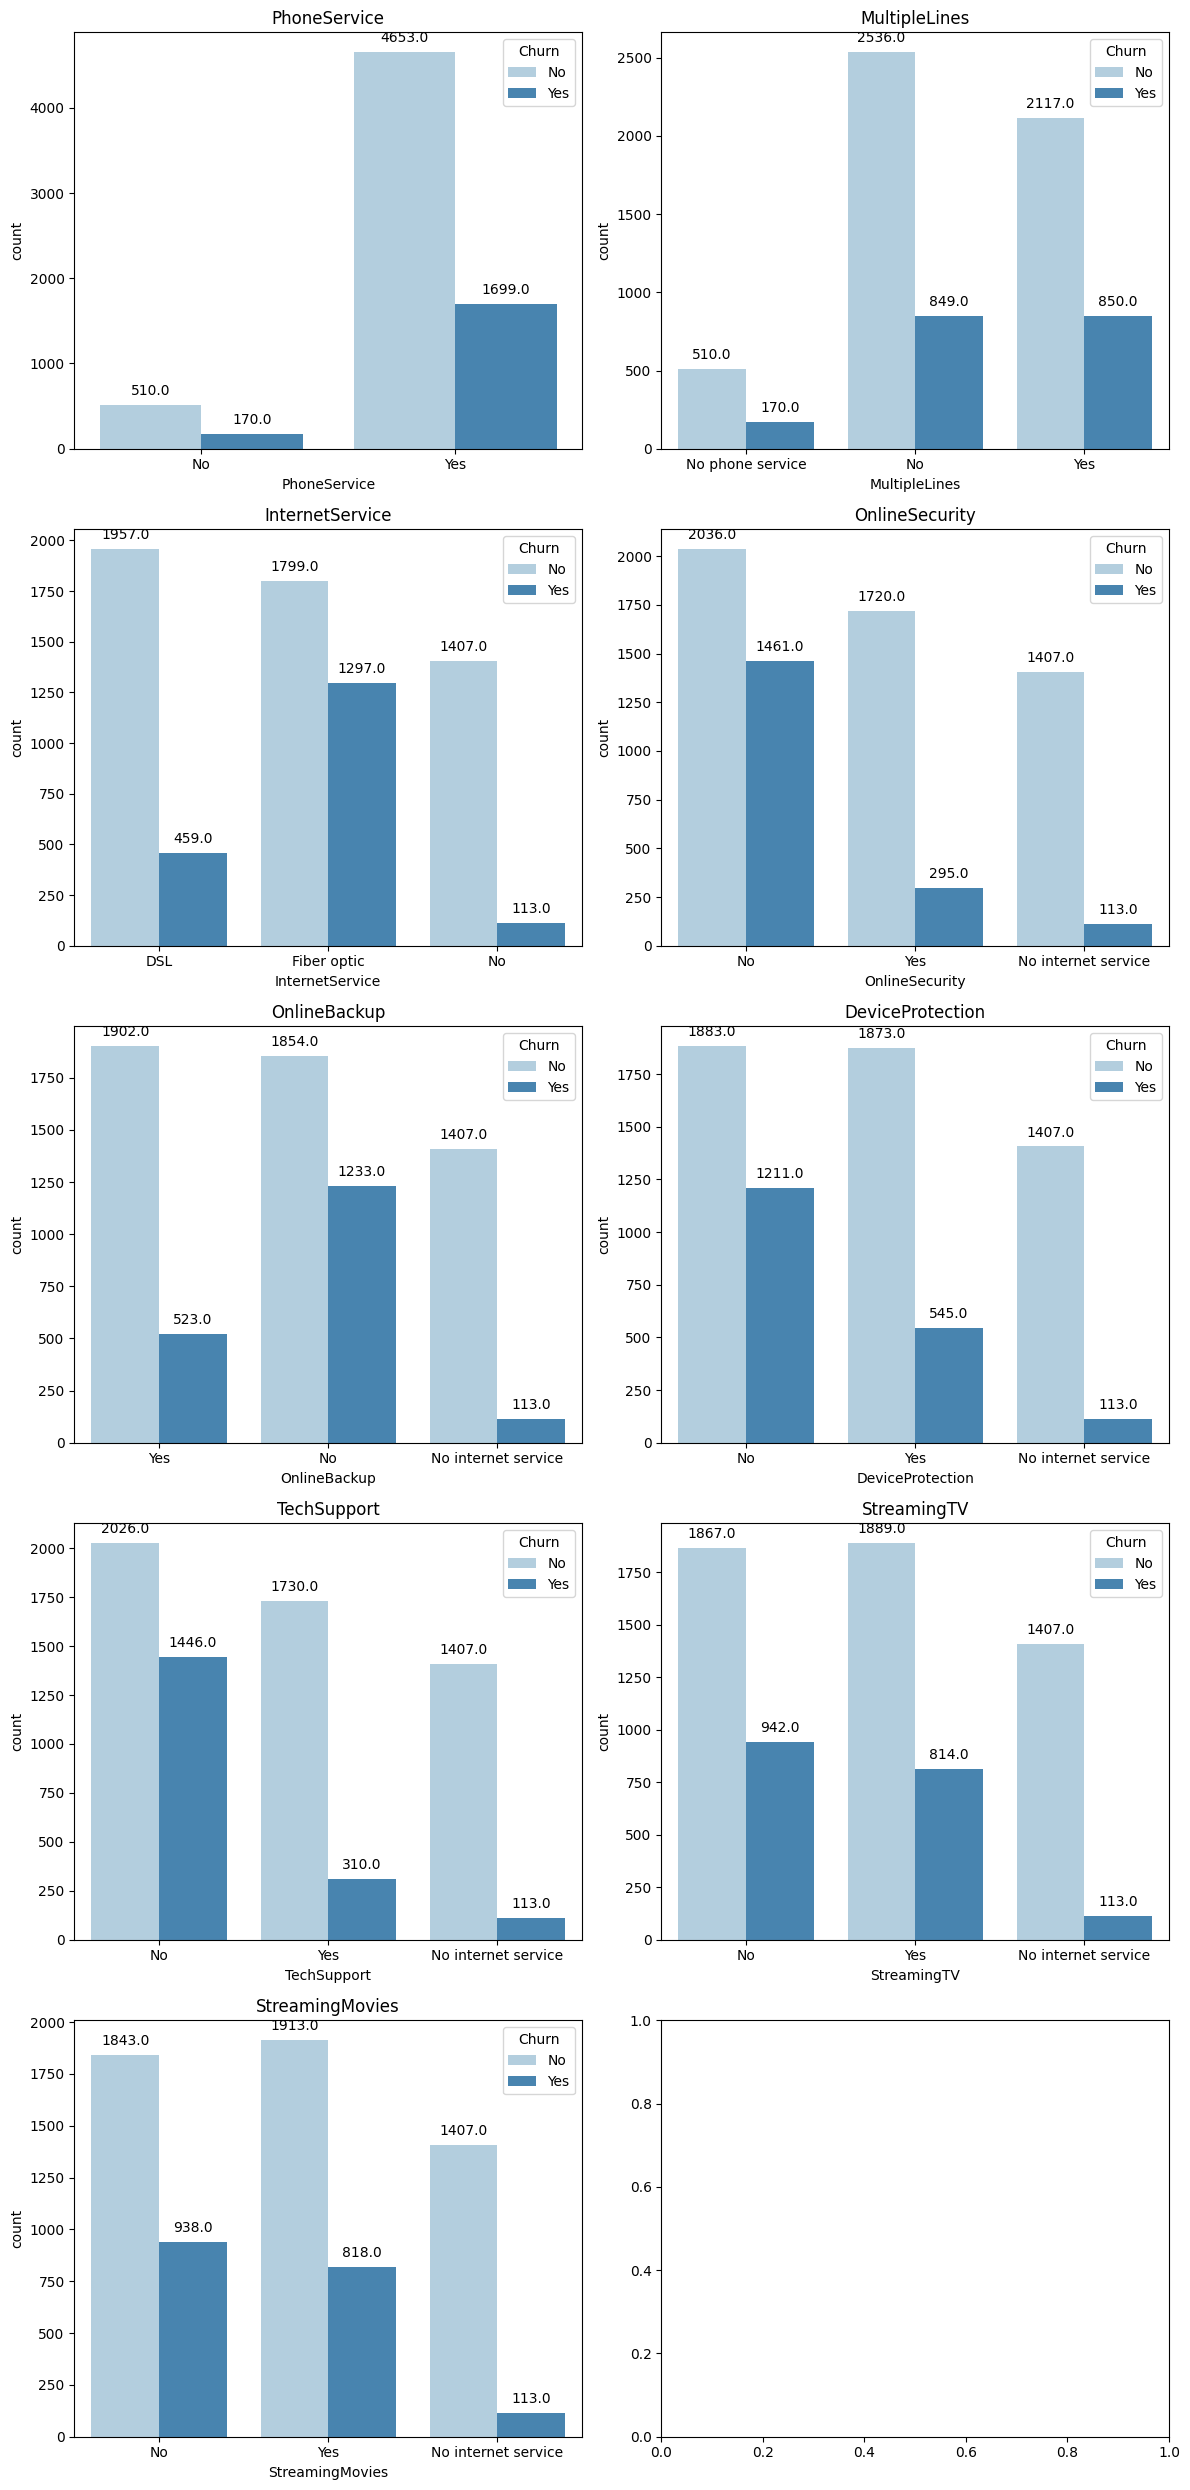

In [22]:
# Example usage
customer_services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                     "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plot_categorical_to_target(df, customer_services, "Churn")



*   Higher churn rate for customers who has the phone service(1699)
*   Customers with internet service **fiber optic** have a higher churn rate compared with DSL and No.
*   The much higher churn rate for customers without online security(1461).
*   Customers who don’t have access to tech support tend to leave more frequently than those who do.
*   Customers without online backup and device protection have a higher churn rate(1233).







**2.1 Analysis Customer Account Information — (Categorical Variables)**

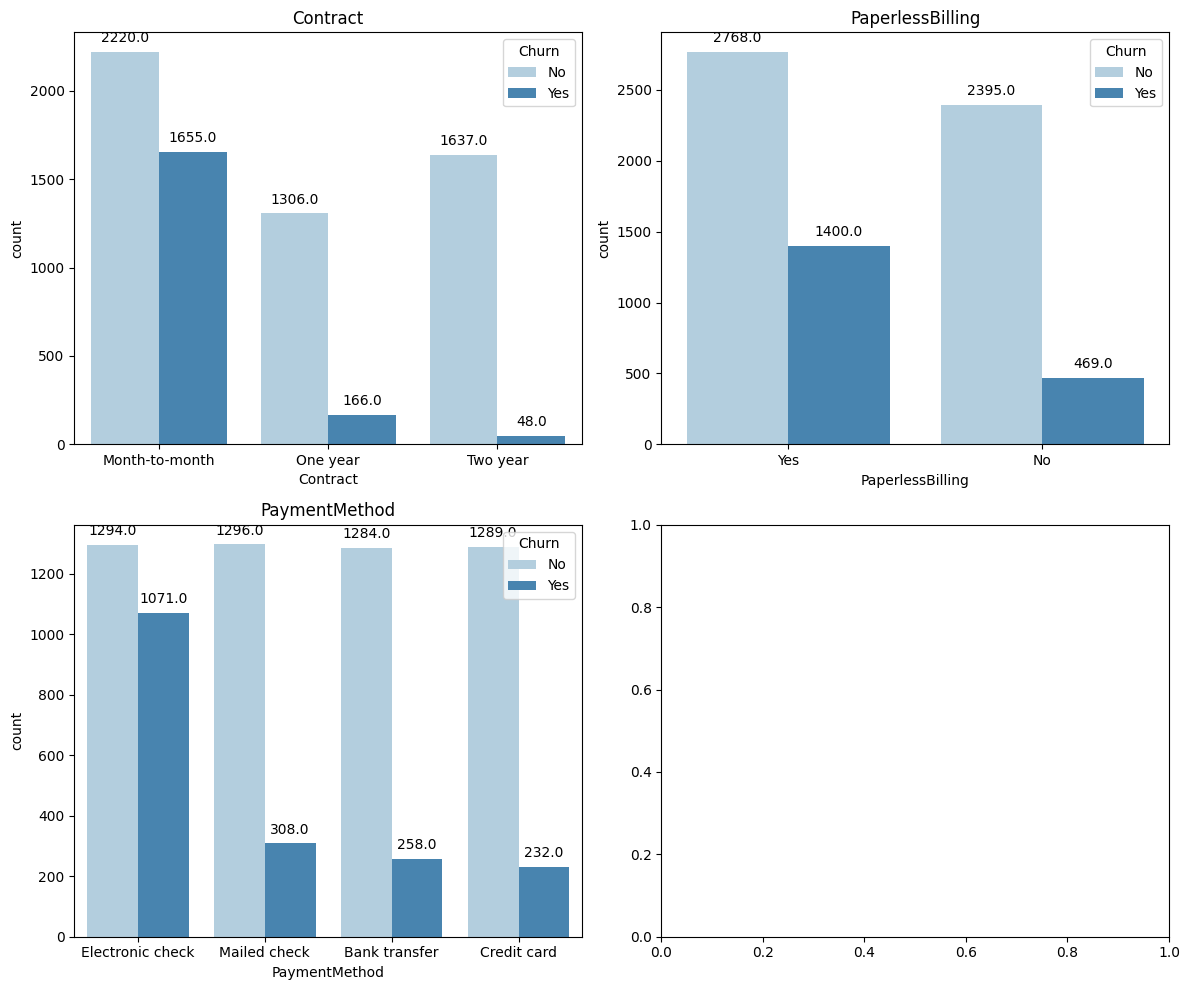

In [23]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

*   Customers are more likely to churn with month-to-month contracts(1655).
*   Moderately higher churn rate with electronic check payment method(1071).
*   Customers with paperless billing have higher churn rates(1400).

**2.2 Analysis Customer Account Information — (Numerical Variables)**





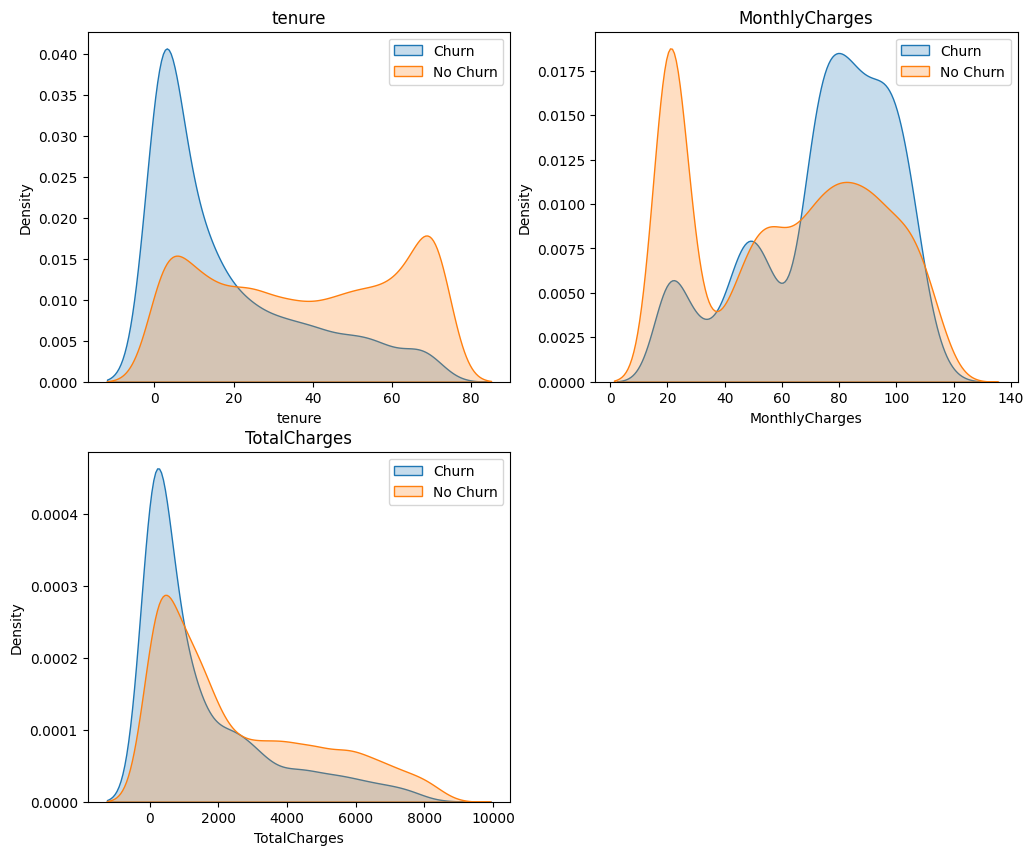

In [24]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")


*   short tenure are more churn.
*   more paying on monthly charges have higher churn rates.
*   high total charges tend to churn.


**3. Analysis of Customer's Demographic Info (All Cate..)**

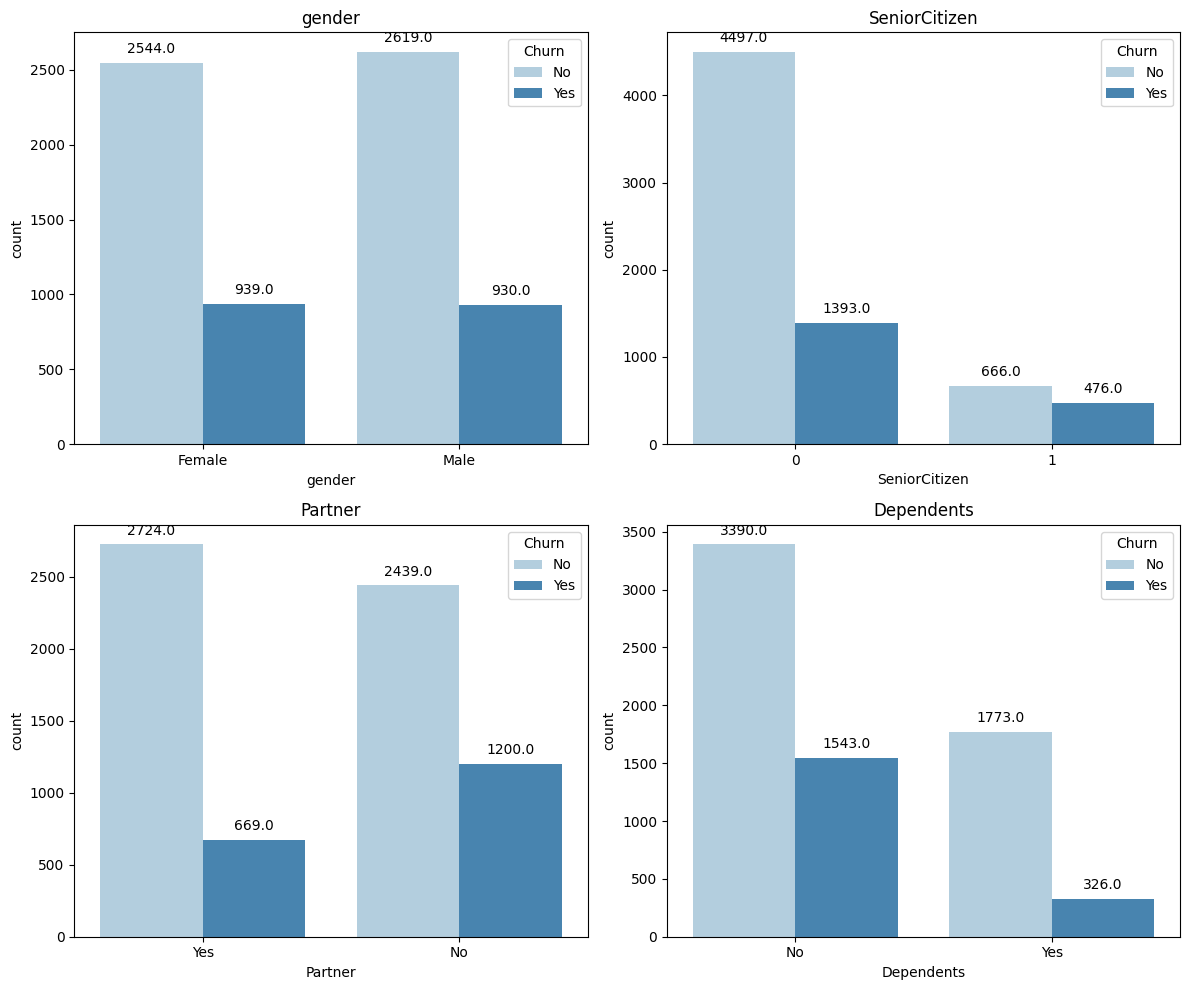

In [25]:
customer_account_cat = ["gender", "SeniorCitizen", "Partner", "Dependents"]
plot_categorical_to_target(df,customer_account_cat,"Churn")


*   no have differences for each gender.
*   Young customers are more likely to churn rather than old customers.
*   Customers with a partner are less churn than with a partner.




# **6. Data Preprocessing**

**6.1  Outlier Checking with Boxplot for Numerical Variables**

check outliers from each numerical variable such as **tenure, MonthlyCharges, and TotalCharges.**

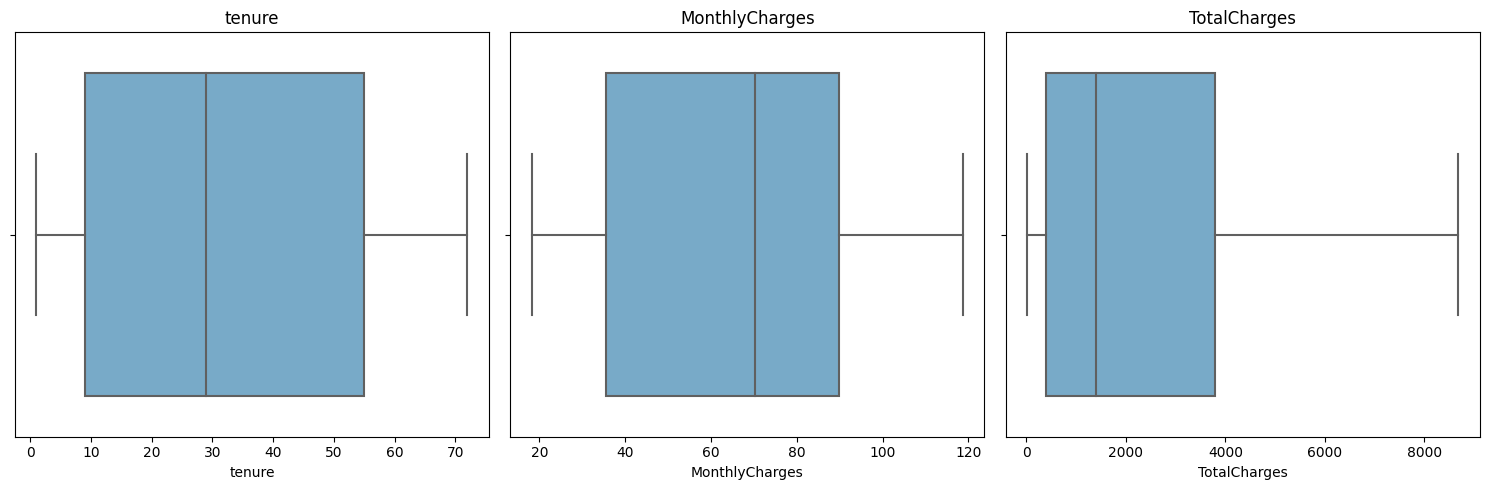

In [26]:
def outlier_check_boxplot(df, numerical_values):
    number_of_columns = len(numerical_values)
    number_of_rows = 1

    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(5 * number_of_columns, 5))

    for index, column in enumerate(numerical_values, 0):
        ax = axes[index] if number_of_columns > 1 else axes
        sns.boxplot(x=column, data=df, palette="Blues", ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.savefig("Outliers_check.png", dpi=300)
    plt.show()

# Example usage
numerical_values = ["tenure", "MonthlyCharges", "TotalCharges"]
outlier_check_boxplot(df, numerical_values)


**Each numerical variable doesn’t have an outlier**

**6.2 Feature Engineering**

**6.2.1 Encoding for categorical variables**

In [27]:
# List of categorical features to label encode
features_to_label_encode = [
    'Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod','gender'
]

# Apply Label Encoding and save the result in df_le
df_le = df.copy()  # Create a copy of the original DataFrame
label_encoder = LabelEncoder()
for feature in features_to_label_encode:
    df_le[feature] = label_encoder.fit_transform(df_le[feature])

In [28]:
df_le.shape

(7032, 20)

**6.2.2 Encoding for categorical variables that have two values, one hot encoding for categorical variables that have more than two values**

In [29]:
#label encoding
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df


df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [30]:
#One Hot Encoding
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [31]:
df_ohe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [32]:
df_ohe.shape

(7032, 41)

**6.3 Feature Scaling**

MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PowerTransformer

**MinMaxScaler** Numerica features







*   df_ohe




In [33]:
#features to be scaled / normalize
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

#creating a dataframe
df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

#creating scalin range
mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
#final dataset
df_ohe_s = pd.concat([rescaled_feature_df,df_remaining],axis=1)


**6.4 Feature Selection**

**Find Correlation with target**

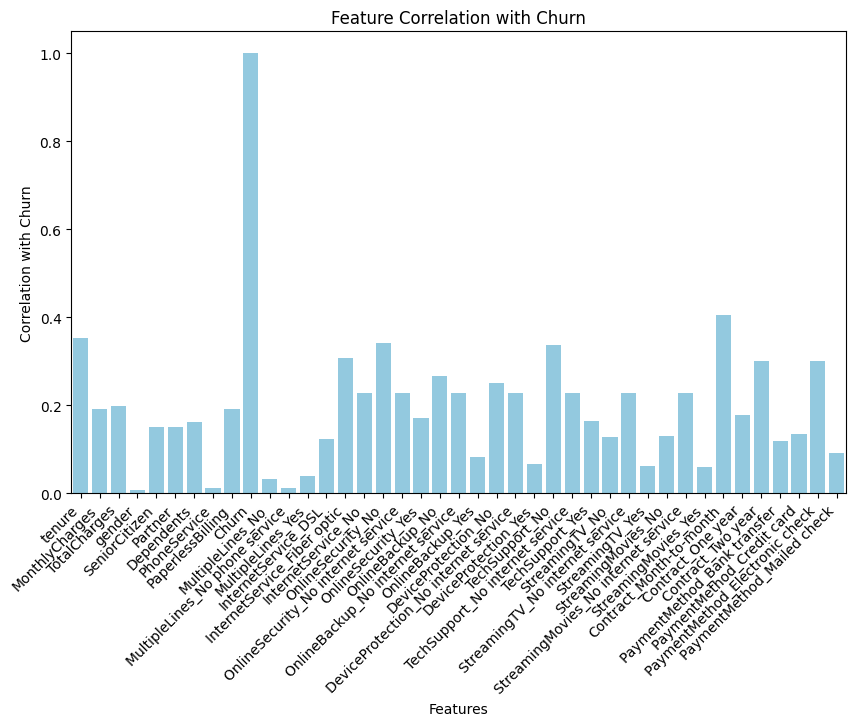

In [34]:
correlation_matrix = df_ohe_s.corr()

# Extract the correlation values between features and the target
correlation_with_target = correlation_matrix['Churn'].abs()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Feature Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.show()

**So Remove features "gender", "PhoneService"**

---




In [35]:
features_to_remove = ["gender", "PhoneService"]

#dataset
df_ohe_s_c = df_ohe_s.drop(columns=features_to_remove)

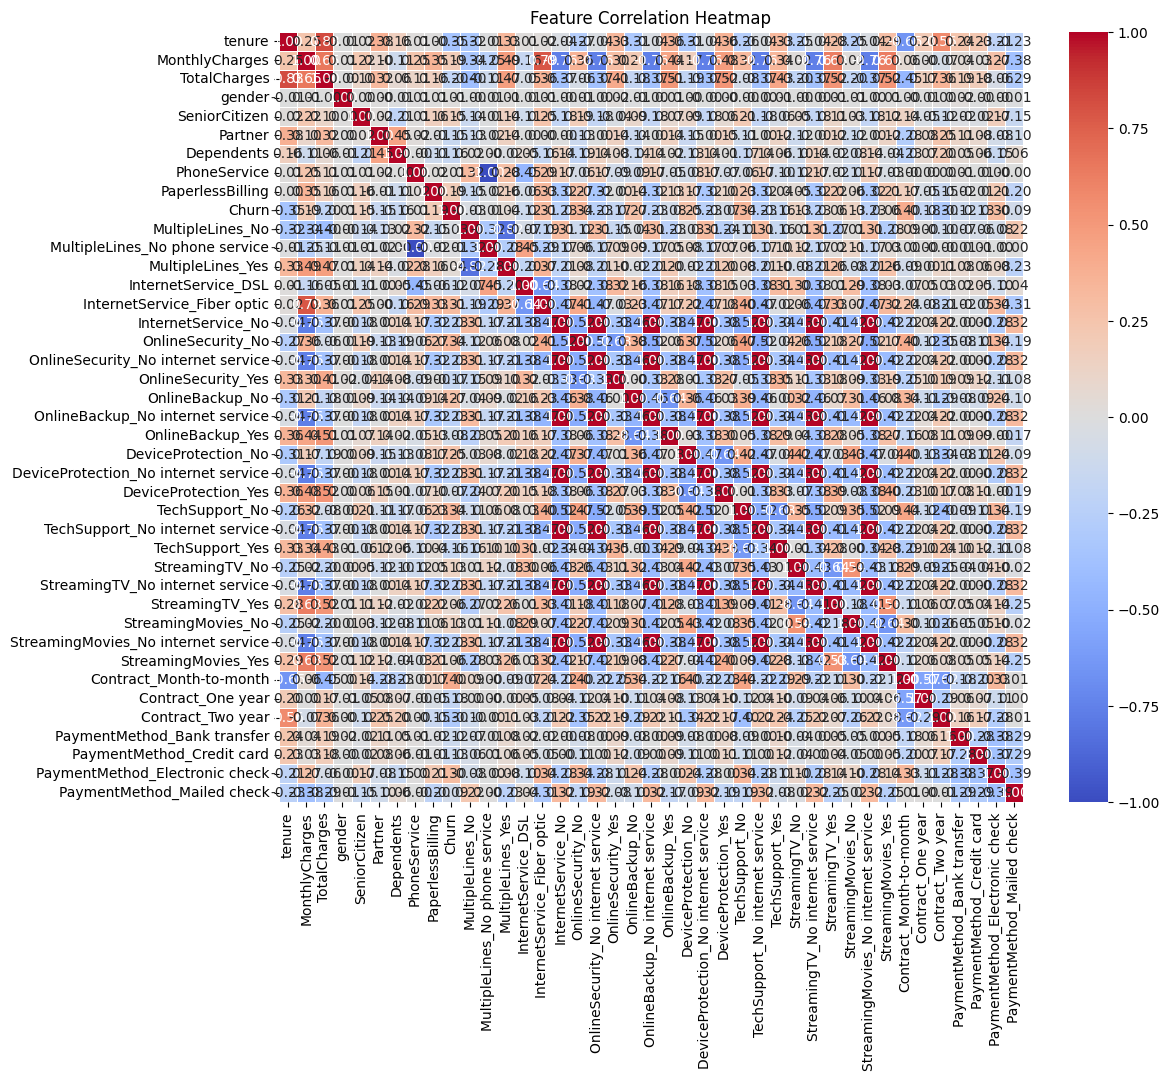

In [36]:
#correlation for features vs features
correlation_matrix = df_ohe_s.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# **7. Machine Learning Model Evaluations and Predictions**




*   KNN,SV,Random Forest,XBoost,NN,Catboost,voting classifier
*   Data Class is imbalance so use Upsambling(SMOTE/ADASYN/**SMOTEENN**) or Downsampling





In [37]:
target = 'Churn'

#Devide dataset
X_ohe = df_ohe_s_c.drop(columns = [target])
y_ohe = df_ohe_s_c[target]


# **Evaluation code**

In [38]:
def classification_report_custom(y_test, y_pred_test, model_name):
    class_report = classification_report(y_test, y_pred_test, target_names=["No Churn", "Churn"])

    print(f"Classification Report for - {model_name}")
    print(class_report)
    return print("\n")


def confusion_matrix_all(y_test,y_pred_test, model_name):
  # Confusion Matrix - Test Set
  cm_test = confusion_matrix(y_test, y_pred_test)
  disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No Churn", "Churn"])
  disp_test.plot()
  plt.title(f"Confusion Matrix - {model_name}")
  plt.show()
  return print("\n")


def roc_curv_all(y_test, y_pred_test,model_name):
  # Calculate ROC Curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
  roc_auc = roc_auc_score(y_test, y_pred_test)

  # Plot ROC Curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for -{model_name}')
  plt.legend(loc="lower right")
  plt.show()
  return print("\n")


def precision_recall_curve_all(y_test, y_pred_test, model_name):
  # Calculate Precision-Recall Curve and Average Precision Score
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
  avg_precision = average_precision_score(y_test, y_pred_test)

  # Plot Precision-Recall Curve
  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, color='green', lw=2, label=f'Avg. Precision = {avg_precision:.2f}')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'Precision-Recall Curve - {model_name}')
  plt.legend(loc="upper right")
  plt.show()
  return print("\n")

## **1. KNN**

**Using SMOTEENN for handle class Imbalance**

**1.1 Normal model with imbalance data set**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=40)

# Train the final model with the best hyperparameters
best_knn_classifier = KNeighborsClassifier()
best_knn_classifier.fit(X_train, y_train)

y_pred_test = best_knn_classifier.predict(X_test)
y_pred_train = best_knn_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 75.62%
Train Accuracy: 83.24%


**Handle Imbalance problem**

In [40]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

**1.2 Find Hyper parameters**

In [41]:
def objective(trial):
    # Define hyperparameters to be optimized
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)
    p = trial.suggest_int('p', 1, 2)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    # Create KNeighborsClassifier with hyperparameters
    knn_classifier = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        leaf_size=leaf_size,
        p=p,
        metric=metric
    )

    # Calculate cross-validated accuracy score
    # Use cross_val_score for better estimation of model performance
    cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=7)

    # Return the mean cross-validated accuracy as the objective value to be minimized
    return 1.0 - cv_scores.mean()

# Create a study object and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-31 17:56:51,690] A new study created in memory with name: no-name-7a1be891-24da-49ee-9eb0-053915c498e0
[I 2023-12-31 17:56:57,010] Trial 0 finished with value: 0.03858784893267664 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 17, 'p': 2, 'metric': 'manhattan'}. Best is trial 0 with value: 0.03858784893267664.
[I 2023-12-31 17:56:58,411] Trial 1 finished with value: 0.08189655172413801 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 19, 'p': 2, 'metric': 'minkowski'}. Best is trial 0 with value: 0.03858784893267664.
[I 2023-12-31 17:57:01,935] Trial 2 finished with value: 0.05623973727422005 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 46, 'p': 1, 'metric': 'euclidean'}. Best is trial 0 with value: 0.03858784893267664.
[I 2023-12-31 17:57:04,568] Trial 3 finished with value: 0.019909688013136306 and parameters: {'n_neighbors': 2, 'weig

Best Hyperparameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 40, 'p': 1, 'metric': 'euclidean'}


In [42]:
# Train the final model with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

y_pred_test = best_knn_classifier.predict(X_test)
y_pred_train = best_knn_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("After Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

After Tune Hyper Parameters 
Test Accuracy: 98.44%
Train Accuracy: 100.00%


**Evaluation**

In [43]:
classification_report_custom(y_test, y_pred_test, " KNN ")

Classification Report for -  KNN 
              precision    recall  f1-score   support

    No Churn       0.99      0.97      0.98       548
       Churn       0.98      0.99      0.99       671

    accuracy                           0.98      1219
   macro avg       0.99      0.98      0.98      1219
weighted avg       0.98      0.98      0.98      1219





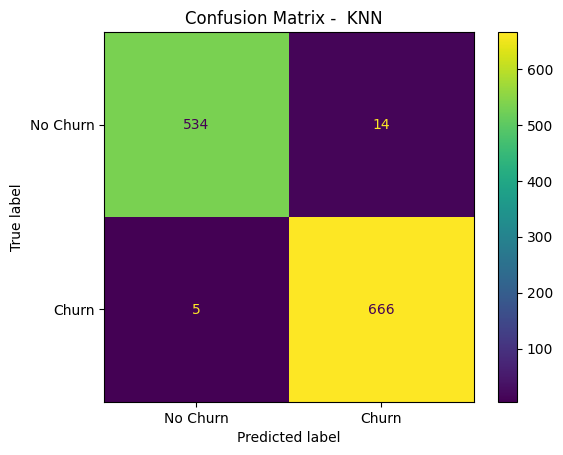

In [44]:
confusion_matrix_all(y_test,y_pred_test, " KNN  ")

**ROC Curve and AUC**

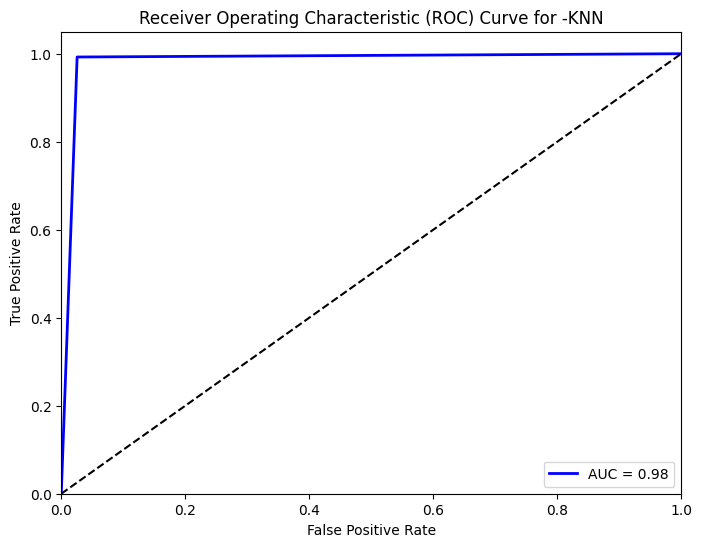

In [45]:
roc_curv_all(y_test, y_pred_test,"KNN")

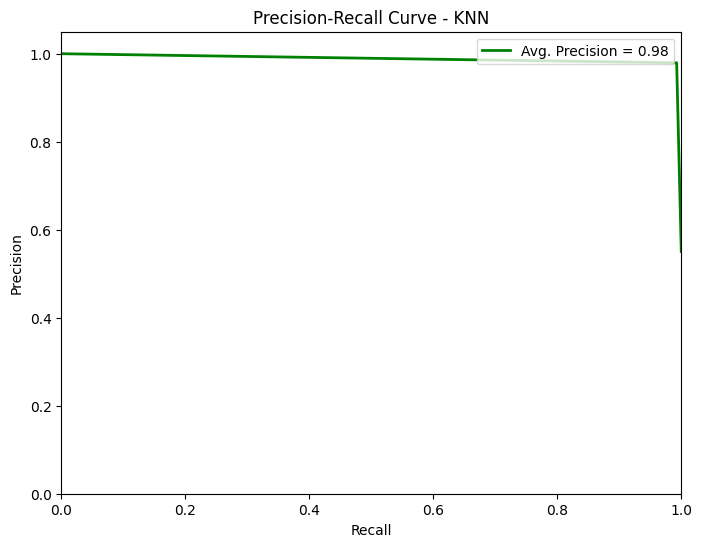

In [46]:
precision_recall_curve_all(y_test, y_pred_test, "KNN")

# 2. **Random Forest**

**2.1 Normal model with imbalance data set**

In [47]:
# Train the  model without the best hyperparameters

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=40)

best_rf_classifier = RandomForestClassifier()
best_rf_classifier.fit(X_train, y_train)

y_pred_test = best_rf_classifier.predict(X_test)
y_pred_train = best_rf_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 76.83%
Train Accuracy: 99.73%


**Handle Imbalance problem**

In [48]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)


**2.2 Find Hyper parameters**

In [49]:

def objective(trial):
    # Define hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 80, 110)
    max_depth = trial.suggest_int('max_depth', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create RandomForestClassifier with hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        # min_samples_split=min_samples_split,
        # min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=40
    )

    # Calculate cross-validated accuracy score
    # Use cross_val_score for better estimation of model performance
    cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

    # Return the mean cross-validated accuracy as the objective value to be minimized
    return 1.0 - cv_scores.mean()

# Create a study object and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-31 17:58:08,737] A new study created in memory with name: no-name-3cb3645b-7153-4891-8c77-f790d693698a
[I 2023-12-31 17:58:10,192] Trial 0 finished with value: 0.1052845528455284 and parameters: {'n_estimators': 92, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.1052845528455284.
[I 2023-12-31 17:58:11,502] Trial 1 finished with value: 0.11097560975609755 and parameters: {'n_estimators': 86, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.1052845528455284.
[I 2023-12-31 17:58:13,033] Trial 2 finished with value: 0.08556910569105691 and parameters: {'n_estimators': 87, 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.08556910569105691.
[I 2023-12-31 17:58:14,276] Trial 3 finished with value: 0.1170731707317072 and parameters: {'n_estimators': 91, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.08556910569105691.
[I 2023-12-31 17:58:15,979] Trial 4 finished with value: 0.127032520325203

Best Hyperparameters: {'n_estimators': 87, 'max_depth': 5, 'max_features': 'sqrt'}


In [50]:
# Train the final model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


y_pred_test = best_rf_classifier.predict(X_test)
y_pred_train = best_rf_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("After Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

After Tune Hyper Parameters 
Test Accuracy: 92.36%
Train Accuracy: 91.67%


In [51]:
classification_report_custom(y_test, y_pred_test, " Random Forest ")

Classification Report for -  Random Forest 
              precision    recall  f1-score   support

    No Churn       0.93      0.90      0.92       564
       Churn       0.92      0.94      0.93       666

    accuracy                           0.92      1230
   macro avg       0.92      0.92      0.92      1230
weighted avg       0.92      0.92      0.92      1230





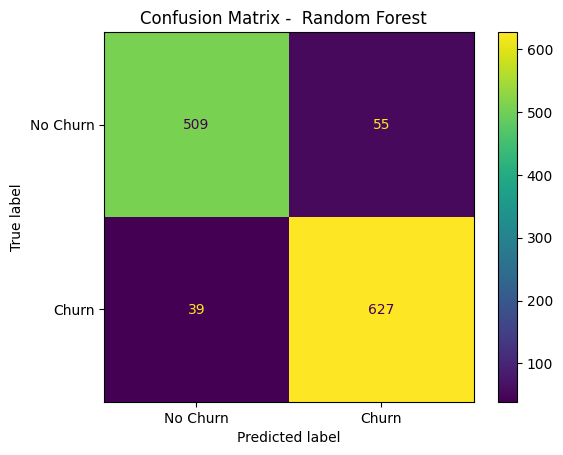

In [52]:
confusion_matrix_all(y_test,y_pred_test, " Random Forest  ")

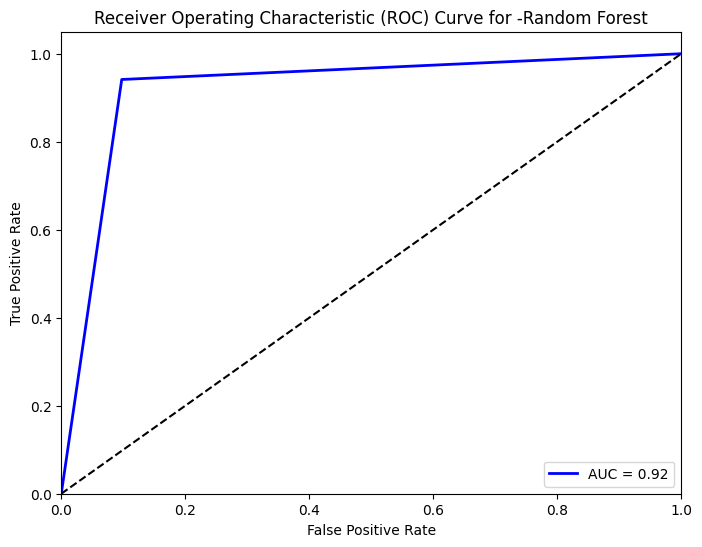

In [53]:
roc_curv_all(y_test, y_pred_test,"Random Forest")

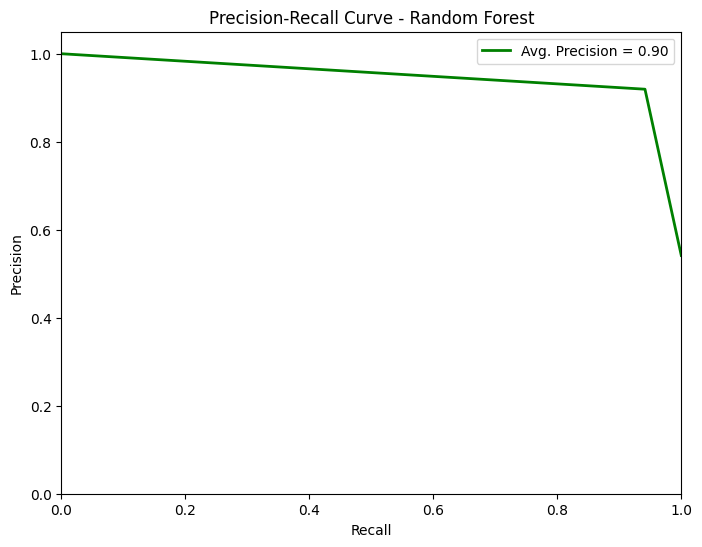

In [54]:
precision_recall_curve_all(y_test, y_pred_test, "Random Forest")

# **Boosting Algorithm**

# **3. XGBoost**

**3.1 Normal model with imbalance data set**

In [55]:
# Train the  model without the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=40)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 77.83%
Train Accuracy: 93.19%


**Handle Imbalance problem**

In [56]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

**3.2 Find Hyper parameters**

In [57]:
def objective(trial):
    # Define hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 5, 110)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)

    # Create XGBClassifier with hyperparameters
    xgb_classifier = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='binary:logistic',  #  binary classification
        random_state=40
    )

    # Calculate cross-validated accuracy score
    # Use cross_val_score for better estimation of model performance
    cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=6)

    # Return the mean cross-validated accuracy as the objective value to be minimized
    return 1.0 - cv_scores.mean()

# Create a study object and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-31 17:58:46,372] A new study created in memory with name: no-name-c61c73a4-dd9c-4058-bc57-6f7cc851732c
[I 2023-12-31 17:58:47,153] Trial 0 finished with value: 0.053927898843152966 and parameters: {'n_estimators': 60, 'max_depth': 8, 'learning_rate': 0.13664113001345507, 'subsample': 0.8526163743369584, 'colsample_bytree': 0.23237318985670116}. Best is trial 0 with value: 0.053927898843152966.
[I 2023-12-31 17:58:48,161] Trial 1 finished with value: 0.04160760143810993 and parameters: {'n_estimators': 72, 'max_depth': 8, 'learning_rate': 0.1652727733700806, 'subsample': 0.6338275500045776, 'colsample_bytree': 0.7353329575364741}. Best is trial 1 with value: 0.04160760143810993.
[I 2023-12-31 17:58:48,573] Trial 2 finished with value: 0.07190574021082508 and parameters: {'n_estimators': 15, 'max_depth': 10, 'learning_rate': 0.17761440827637973, 'subsample': 0.17264693065601927, 'colsample_bytree': 0.6942830025430532}. Best is trial 1 with value: 0.04160760143810993.
[I 2023-1

Best Hyperparameters: {'n_estimators': 99, 'max_depth': 7, 'learning_rate': 0.1982948508020612, 'subsample': 0.6738323407951345, 'colsample_bytree': 0.9687249038416146}


In [58]:
# Train the final model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

y_pred_test = best_xgb_classifier.predict(X_test)
y_pred_train = best_xgb_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("After Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

After Tune Hyper Parameters 
Test Accuracy: 96.53%
Train Accuracy: 99.94%


In [59]:
classification_report_custom(y_test, y_pred_test, " XGBoost  ")

Classification Report for -  XGBoost  
              precision    recall  f1-score   support

    No Churn       0.96      0.96      0.96       558
       Churn       0.97      0.97      0.97       680

    accuracy                           0.97      1238
   macro avg       0.96      0.97      0.96      1238
weighted avg       0.97      0.97      0.97      1238





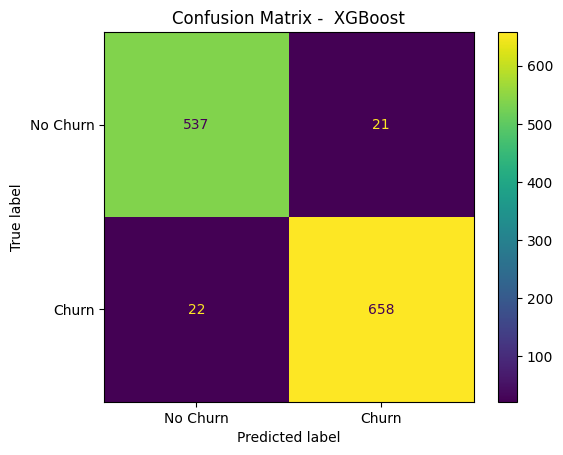

In [60]:
confusion_matrix_all(y_test,y_pred_test, " XGBoost")

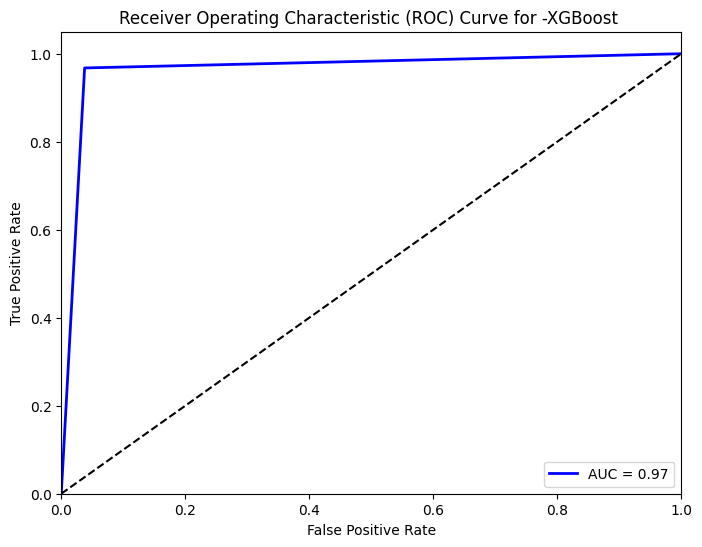

In [61]:
roc_curv_all(y_test, y_pred_test,"XGBoost ")

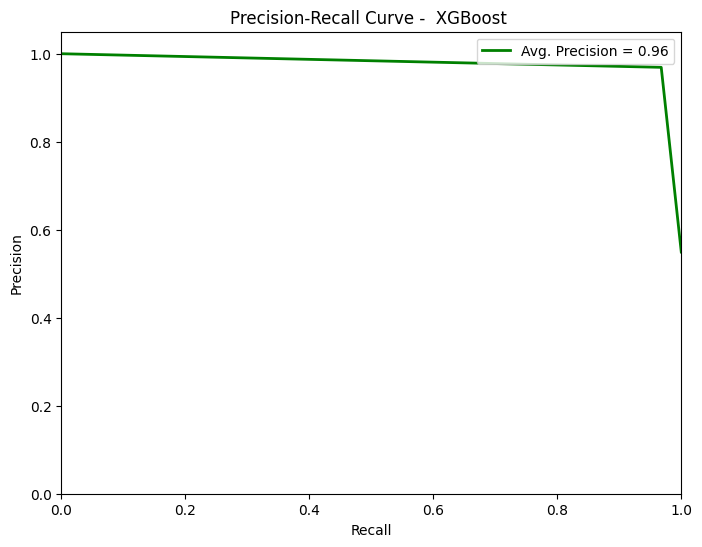

In [62]:
precision_recall_curve_all(y_test, y_pred_test, " XGBoost ")

# **4. CatBoost**

**4.1 Normal model with imbalance data set**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=40 )

# Train the model
best_cb_classifier = CatBoostClassifier()
best_cb_classifier.fit(X_train, y_train)


y_pred_test = best_cb_classifier.predict(X_test)
y_pred_train = best_cb_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Learning rate set to 0.02154
0:	learn: 0.6783124	total: 59.7ms	remaining: 59.6s
1:	learn: 0.6640892	total: 63.2ms	remaining: 31.5s
2:	learn: 0.6513159	total: 70.8ms	remaining: 23.5s
3:	learn: 0.6388680	total: 83.1ms	remaining: 20.7s
4:	learn: 0.6272064	total: 88.1ms	remaining: 17.5s
5:	learn: 0.6169759	total: 99ms	remaining: 16.4s
6:	learn: 0.6066678	total: 107ms	remaining: 15.2s
7:	learn: 0.5964640	total: 117ms	remaining: 14.5s
8:	learn: 0.5866262	total: 128ms	remaining: 14s
9:	learn: 0.5774468	total: 143ms	remaining: 14.1s
10:	learn: 0.5689229	total: 153ms	remaining: 13.8s
11:	learn: 0.5607657	total: 164ms	remaining: 13.5s
12:	learn: 0.5531469	total: 172ms	remaining: 13.1s
13:	learn: 0.5460815	total: 176ms	remaining: 12.4s
14:	learn: 0.5391732	total: 182ms	remaining: 11.9s
15:	learn: 0.5327399	total: 191ms	remaining: 11.7s
16:	learn: 0.5266495	total: 196ms	remaining: 11.4s
17:	learn: 0.5207745	total: 201ms	remaining: 11s
18:	learn: 0.5159961	total: 206ms	remaining: 10.6s
19:	learn: 0

**Handle Imbalance Problem**

In [64]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

**4.2 Find Hyper parameters**

In [65]:
def objective(trial):
    # Define hyperparameters to be optimized
    iterations = trial.suggest_int('iterations', 10, 110)
    depth = trial.suggest_int('depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1, 1.0)

    # Create CatBoostClassifier
    catboost_classifier = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bylevel=colsample_bylevel,
        loss_function='Logloss',  # binary classification loss
        random_state=40,
        verbose=0
    )

    # Calculate cross-validated accuracy score
    # Use cross_val_score for better estimation of model performance
    cv_scores = cross_val_score(catboost_classifier, X_train, y_train, cv=6, scoring='accuracy')

    # Return the mean cross-validated accuracy as the objective value to be minimized
    return 1.0 - cv_scores.mean()

# Create a study object and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-31 17:59:16,595] A new study created in memory with name: no-name-b89ccd95-bc68-4307-962f-b3083eb0ceee
[I 2023-12-31 17:59:27,389] Trial 0 finished with value: 0.053152888104344265 and parameters: {'iterations': 64, 'depth': 10, 'learning_rate': 0.03546608098534627, 'subsample': 0.8854674938658138, 'colsample_bylevel': 0.31627114912312726}. Best is trial 0 with value: 0.053152888104344265.
[I 2023-12-31 17:59:29,435] Trial 1 finished with value: 0.046281014023732414 and parameters: {'iterations': 60, 'depth': 7, 'learning_rate': 0.13069740106707903, 'subsample': 0.28941644853224, 'colsample_bylevel': 0.48139507670807635}. Best is trial 1 with value: 0.046281014023732414.
[I 2023-12-31 17:59:30,299] Trial 2 finished with value: 0.05962047661076786 and parameters: {'iterations': 41, 'depth': 5, 'learning_rate': 0.16378334288593416, 'subsample': 0.6504759398242227, 'colsample_bylevel': 0.7234020634200705}. Best is trial 1 with value: 0.046281014023732414.
[I 2023-12-31 17:59:31

Best Hyperparameters: {'iterations': 94, 'depth': 9, 'learning_rate': 0.1653069760982156, 'subsample': 0.5896256663448086, 'colsample_bylevel': 0.5579448097237106}


In [66]:
# Train the final model with the best hyperparameters
best_cb_classifier = CatBoostClassifier(**best_params)
best_cb_classifier.fit(X_train, y_train)


y_pred_test = best_cb_classifier.predict(X_test)
y_pred_train = best_cb_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("After Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

0:	learn: 0.4799066	total: 17.5ms	remaining: 1.63s
1:	learn: 0.3666642	total: 34.6ms	remaining: 1.59s
2:	learn: 0.2882020	total: 52.1ms	remaining: 1.58s
3:	learn: 0.2534686	total: 60.8ms	remaining: 1.37s
4:	learn: 0.2225700	total: 79.8ms	remaining: 1.42s
5:	learn: 0.1965290	total: 95.7ms	remaining: 1.4s
6:	learn: 0.1818263	total: 116ms	remaining: 1.44s
7:	learn: 0.1693861	total: 132ms	remaining: 1.42s
8:	learn: 0.1592891	total: 150ms	remaining: 1.42s
9:	learn: 0.1517818	total: 175ms	remaining: 1.47s
10:	learn: 0.1432569	total: 192ms	remaining: 1.45s
11:	learn: 0.1357774	total: 208ms	remaining: 1.42s
12:	learn: 0.1266953	total: 232ms	remaining: 1.44s
13:	learn: 0.1192606	total: 252ms	remaining: 1.44s
14:	learn: 0.1135383	total: 268ms	remaining: 1.41s
15:	learn: 0.1076618	total: 287ms	remaining: 1.4s
16:	learn: 0.1047569	total: 305ms	remaining: 1.38s
17:	learn: 0.1007157	total: 321ms	remaining: 1.36s
18:	learn: 0.0983024	total: 337ms	remaining: 1.33s
19:	learn: 0.0935593	total: 355ms	rem

In [67]:
classification_report_custom(y_test, y_pred_test, " CatBoost  ")

Classification Report for -  CatBoost  
              precision    recall  f1-score   support

    No Churn       0.98      0.95      0.97       563
       Churn       0.96      0.99      0.97       674

    accuracy                           0.97      1237
   macro avg       0.97      0.97      0.97      1237
weighted avg       0.97      0.97      0.97      1237





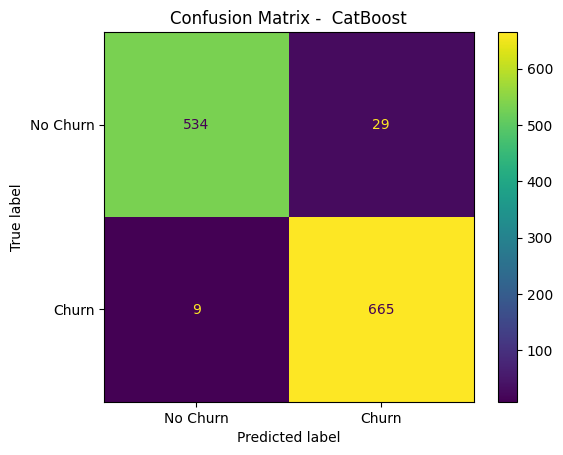

In [68]:
confusion_matrix_all(y_test,y_pred_test, " CatBoost")

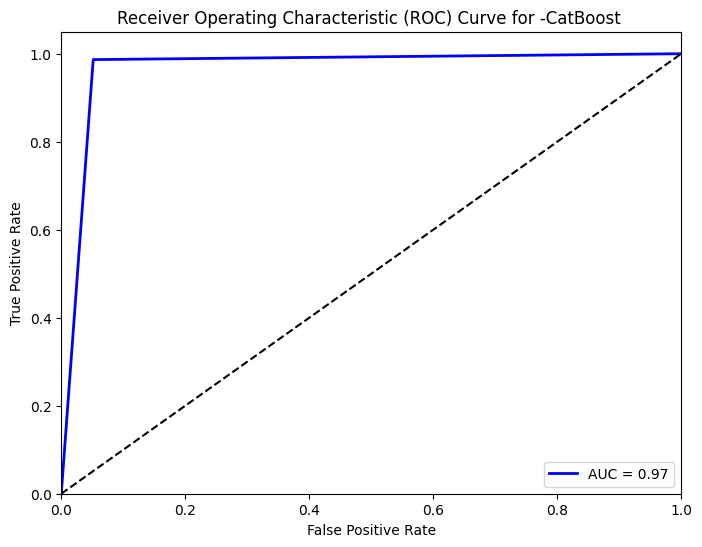

In [69]:
roc_curv_all(y_test, y_pred_test,"CatBoost ")

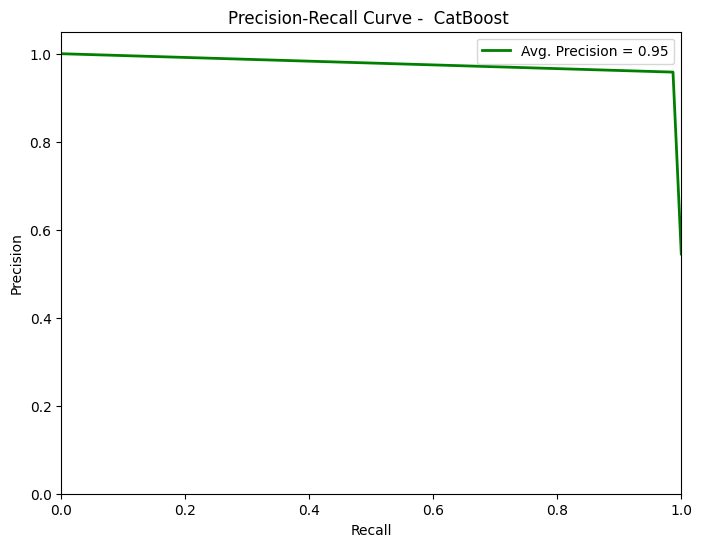

In [70]:
precision_recall_curve_all(y_test, y_pred_test, " CatBoost ")

# **5. Artificial Neural Network**

**Handle Data Imbalance problem**

In [71]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

In [72]:
# Updated model
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))



# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2,)

Epoch 1/200
123/123 [==============================] - 2s 8ms/step - loss: 0.4239 - accuracy: 0.7989 - val_loss: 0.2351 - val_accuracy: 0.9084
Epoch 2/200
123/123 [==============================] - 1s 5ms/step - loss: 0.2710 - accuracy: 0.8964 - val_loss: 0.2182 - val_accuracy: 0.9095
Epoch 3/200
123/123 [==============================] - 1s 5ms/step - loss: 0.2458 - accuracy: 0.9015 - val_loss: 0.2082 - val_accuracy: 0.9105
Epoch 4/200
123/123 [==============================] - 1s 5ms/step - loss: 0.2355 - accuracy: 0.9091 - val_loss: 0.1991 - val_accuracy: 0.9156
Epoch 5/200
123/123 [==============================] - 0s 4ms/step - loss: 0.2276 - accuracy: 0.9145 - val_loss: 0.1958 - val_accuracy: 0.9145
Epoch 6/200
123/123 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9145 - val_loss: 0.1912 - val_accuracy: 0.9186
Epoch 7/200
123/123 [==============================] - 0s 4ms/step - loss: 0.2111 - accuracy: 0.9175 - val_loss: 0.1869 - val_accuracy: 0.9217

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4992      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

**Evaluation**

In [74]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

train_loss,train_accuracy = model.evaluate(X_train,y_train)
print(f'Train Accuracy: {train_accuracy*100:.2f}%')


39/39 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9528
Test Accuracy: 95.28%
154/154 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9874
Train Accuracy: 98.74%


In [75]:
y_pred_test_probs = model.predict(X_test)

#converts these probabilities into binary predictions (0 or 1) based on a threshold of 0.5.
y_pred_test = (y_pred_test_probs > 0.5).astype(int)

#print Report
classification_report_custom(y_test, y_pred_test, "Neural Network")

39/39 [==============================] - 0s 2ms/step
Classification Report for - Neural Network
              precision    recall  f1-score   support

    No Churn       0.95      0.95      0.95       557
       Churn       0.96      0.96      0.96       672

    accuracy                           0.95      1229
   macro avg       0.95      0.95      0.95      1229
weighted avg       0.95      0.95      0.95      1229





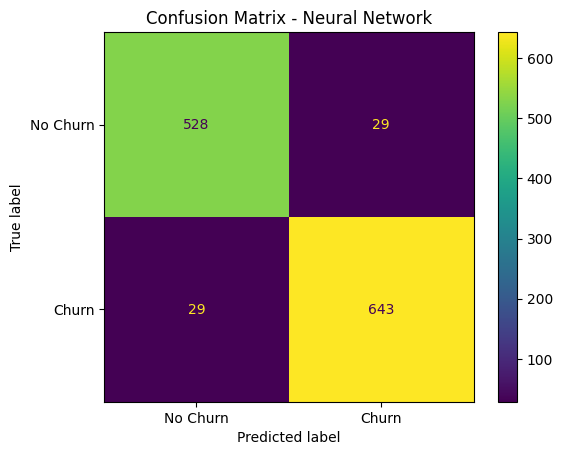

In [76]:
confusion_matrix_all(y_test,y_pred_test, "Neural Network")

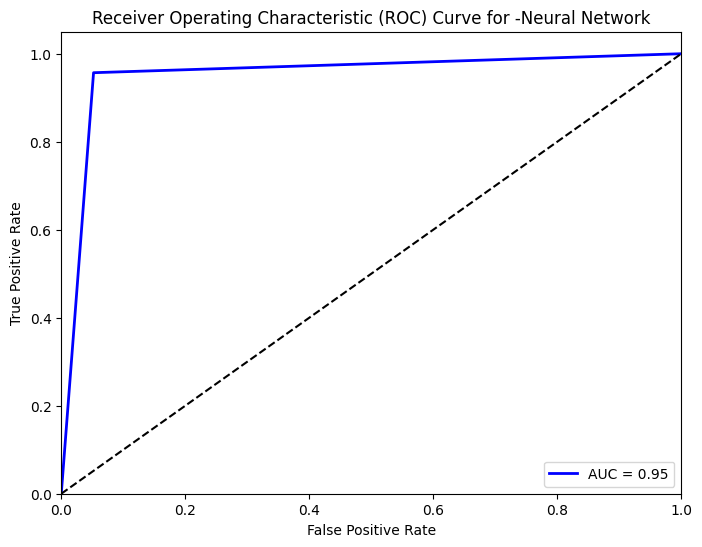

In [77]:
roc_curv_all(y_test, y_pred_test,"Neural Network")

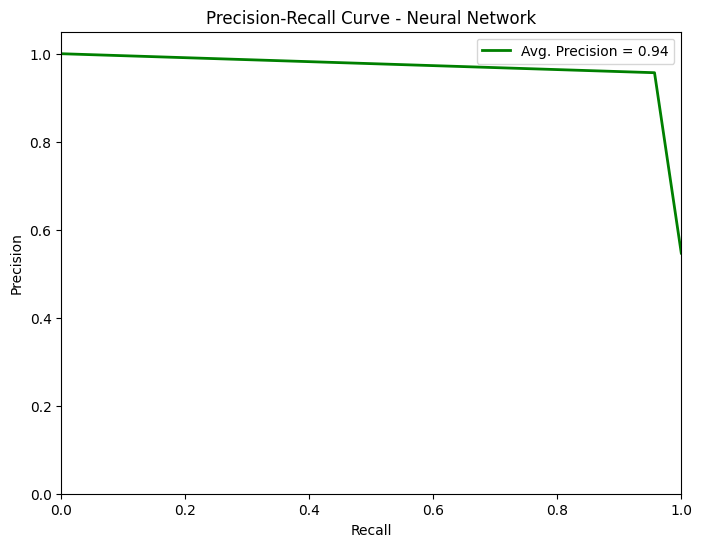

In [78]:
precision_recall_curve_all(y_test, y_pred_test, "Neural Network")

# **6. Support Vector Classifier**

**6.1 Normal SVC**

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=40)

svc = SVC()
svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

# Evaluate the model on test & train
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)


print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 78.75%
Train Accuracy: 81.80%


In [80]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

**6.2 GridSearchCV to tune parameters**

In [81]:
# Define the hyperparameter
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Create an SVC instance
svc = SVC()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVC model with the best hyperparameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=10)

**Evaluation**

In [82]:
y_pred_test = best_svc.predict(X_test)
y_pred_train = best_svc.predict(X_train)

# Evaluate the model on test & train
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 95.41%
Train Accuracy: 98.41%


In [83]:
classification_report_custom(y_test, y_pred_test, "Support Vector Classifier")

Classification Report for - Support Vector Classifier
              precision    recall  f1-score   support

    No Churn       0.94      0.96      0.95       548
       Churn       0.96      0.95      0.96       693

    accuracy                           0.95      1241
   macro avg       0.95      0.95      0.95      1241
weighted avg       0.95      0.95      0.95      1241





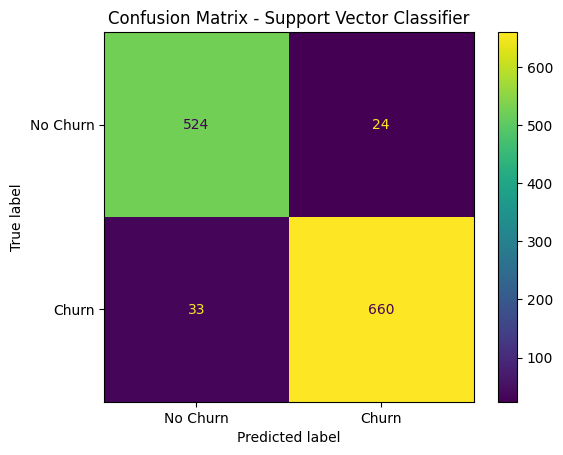

In [84]:
confusion_matrix_all(y_test,y_pred_test, "Support Vector Classifier")

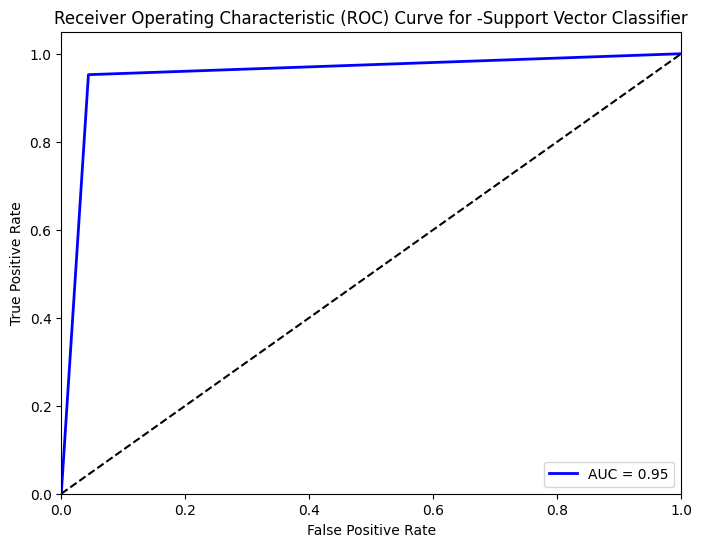

In [85]:
roc_curv_all(y_test, y_pred_test,"Support Vector Classifier")

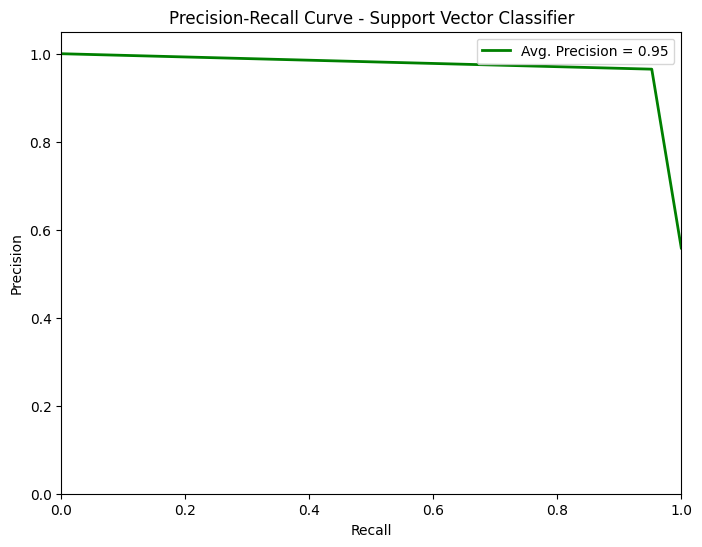

In [86]:
precision_recall_curve_all(y_test, y_pred_test, "Support Vector Classifier")

# **8. Ensemble model**

Make only SVC parameter ( probability = True ) to give input to Voting Classifer

In [87]:
svc_new = SVC(**best_params, probability=True)
svc_new.fit(X_train, y_train)

SVC(C=10, probability=True)

# **voting  Classifier**

In [88]:
from sklearn.ensemble import VotingClassifier

smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_ohe,y_ohe)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

models = [('KNN',best_knn_classifier), ('RandomForest',best_rf_classifier ), ('XGB',best_xgb_classifier), ('CatBoost',best_cb_classifier), ('SVC', svc_new)]
En_model = VotingClassifier(estimators = models, voting = 'soft')
En_model.fit(X_train,y_train)

0:	learn: 0.4830854	total: 25.1ms	remaining: 2.33s
1:	learn: 0.3811839	total: 41.8ms	remaining: 1.92s
2:	learn: 0.3016227	total: 62.3ms	remaining: 1.89s
3:	learn: 0.2639434	total: 71.3ms	remaining: 1.6s
4:	learn: 0.2341867	total: 93.1ms	remaining: 1.66s
5:	learn: 0.2068287	total: 110ms	remaining: 1.61s
6:	learn: 0.1909789	total: 130ms	remaining: 1.62s
7:	learn: 0.1764279	total: 149ms	remaining: 1.6s
8:	learn: 0.1639962	total: 168ms	remaining: 1.59s
9:	learn: 0.1552387	total: 193ms	remaining: 1.62s
10:	learn: 0.1540019	total: 195ms	remaining: 1.47s
11:	learn: 0.1421614	total: 212ms	remaining: 1.45s
12:	learn: 0.1355634	total: 235ms	remaining: 1.47s
13:	learn: 0.1301469	total: 252ms	remaining: 1.44s
14:	learn: 0.1265310	total: 271ms	remaining: 1.43s
15:	learn: 0.1224105	total: 287ms	remaining: 1.4s
16:	learn: 0.1163336	total: 307ms	remaining: 1.39s
17:	learn: 0.1095274	total: 322ms	remaining: 1.36s
18:	learn: 0.1057289	total: 341ms	remaining: 1.35s
19:	learn: 0.1009992	total: 359ms	remai

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=40,
                                                   metric='euclidean',
                                                   n_neighbors=2, p=1,
                                                   weights='distance')),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=87)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.96...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=99, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('CatBoost',
                              <catboost.core.CatBoostClassifier object at 0x79d619724b20>),
                             ('SVC', SVC(C=10, probability=True))],
                 voting='soft')

# **Final model Accuracy**

In [89]:
y_pred_test = En_model.predict(X_test)
y_pred_train = En_model.predict(X_train)

# Evaluate the model on test & train
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Before Tune Hyper Parameters ")
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

Before Tune Hyper Parameters 
Test Accuracy: 97.71%
Train Accuracy: 99.82%
